In [1]:
"""
k-means clustering two-dimensional example: https://datatofish.com/k-means-clustering-python/
"""

from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Put data into DataFrame object

Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = DataFrame(Data)

In [3]:
# Fit dataset onto k-means model with 3 clusters and identify centres for each cluster

kmeans = KMeans(n_clusters=3, random_state = 0).fit(df[['x','y']])
centroids = kmeans.cluster_centers_

print(centroids)

[[55.1 46.1]
 [29.6 66.8]
 [43.2 16.7]]


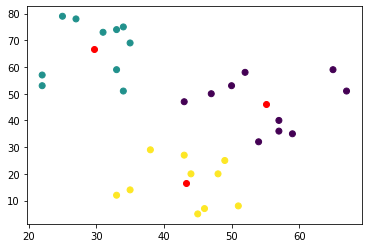

In [4]:
# Plot dataset colour coded with labels assigned in model, along with centres identified in red

plt.scatter(df['x'], df['y'], c= kmeans.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

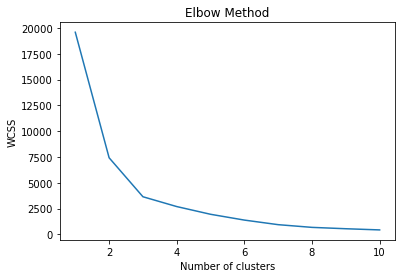

In [5]:
"""
Elbow method to determine k. 

kmeans.inertia_ gives how internally coherent the clusters are (i.e how compact they are - the lower the better). 

Running kmeans against 0-10 nodes and finding the lowest within cluster sum of squares.
"""

from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

x = df.iloc[:,[0,1]]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Optimal number is 3

For no of clusters = 2  The average silhouette_score is : 0.5051959802345012
For no of clusters = 3  The average silhouette_score is : 0.5107383117230143
For no of clusters = 4  The average silhouette_score is : 0.5069597209807262
For no of clusters = 5  The average silhouette_score is : 0.4900358069644153
For no of clusters = 6  The average silhouette_score is : 0.49117979317348903
For no of clusters = 7  The average silhouette_score is : 0.5304256551935675
For no of clusters = 8  The average silhouette_score is : 0.5840681790089147
For no of clusters = 9  The average silhouette_score is : 0.5809247929051023


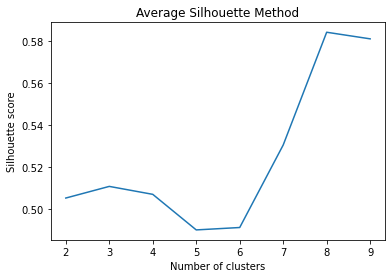

In [6]:
"""
Silouette Width
"""

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
import matplotlib.pyplot as plt

x = df.iloc[:,[0,1]]

result=[]
no_of_clusters = range(2,10)

for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(x) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(x, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 
    result.append(silhouette_avg)


plt.plot(no_of_clusters,result)
plt.title('Average Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# Quality improves beyond 5 clusters